<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/HandPalm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Khai báo các thư viện cần sử dụng
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [20]:
#Kết nối Colab với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
folder='/content/drive/MyDrive/TRI_TUE_NHAN_TAO/HAND_PALM/'

In [22]:
photos,labels = list(),list()
output = 0.0
for file in listdir(folder):
      if file.startswith('0'):
        output=0.0
      if file.startswith('1'):
        output=1.0
      if file.startswith('2'):
        output=2.0
      if file.startswith('3'):
        output=3.0
      if file.startswith('4'):
        output=4.0
      if file.startswith('5'):
        output=5.0
      if file.startswith('6'):
        output=6.0

      photo = load_img(folder+file,target_size=(50,50))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

In [23]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/photo_hand_palm.npy',photos)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/label_hand_palm.npy',labels)
#Kiểm tra kích thước
print("kich thuoc photos",photos.shape)
print("kich thuoc labels",labels.shape)

kich thuoc photos (313, 50, 50, 3)
kich thuoc labels (313,)


In [24]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.2, train_size=0.8)
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc test_x",test_x.shape)

kich thuoc train_x (250, 50, 50, 3)
kich thuoc test_x (63, 50, 50, 3)


In [25]:
#Scale lại data
train_x = train_x.astype('float32')
train_x = train_x/255
     
test_x = test_x.astype('float32')
test_x = test_x/255

In [26]:
from keras.utils import to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [27]:
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc train_labels",train_labels.shape)

kich thuoc train_x (250, 50, 50, 3)
kich thuoc train_labels (250, 7)


In [28]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(50,50,3),padding='same'))
     
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [29]:
classes = 7

model.add(Flatten())
     
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                  

In [44]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

batch_size = 64
epochs = 10

train = model.fit(train_x,train_labels,batch_size, epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, test_labels)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
4/4 [==============================] - 1s 14ms/step - loss: 0.2617 - accuracy: 0.9240
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.2945 - accuracy: 0.9200
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0456 - accuracy: 0.9840
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0891 - accuracy: 0.9560
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0272 - accuracy: 0.9920
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.0338 - accuracy: 0.9841
Accuracy: 0.9841269850730896


In [45]:
model.save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/hand_palm.h5')


1/1 [==============================] - 0s 75ms/step
Chỉ tay cho thấy bạn là người khó tập trung trong công việc, thuận lợi trong tình cảm, tràn trề sức sống


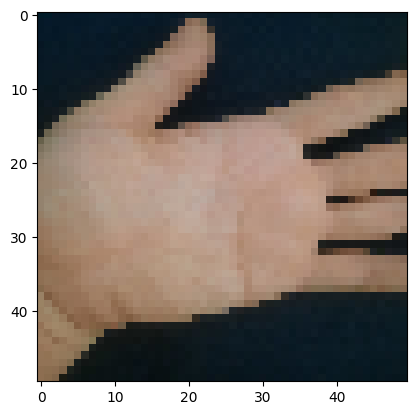

In [46]:
#test mo hinh

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

labels = ['hết lòng trong tình cảm, có suy nghĩ rõ ràng khá tập trung, có một sức khỏe dồi dào', 
          'khỏe mạnh, có tính sáng tạo, tự do bộc lộ cảm xúc',
          'chung thủy, suy nghĩ rõ ràng và khá tập trung, có sức bền tốt',
          'hơi ích kỷ trong tình cảm, yêu thích những gì mình làm ra, tràn trề năng lượng',
          'có sức khỏe tốt, có đam mê với cuộc sống, dễ rung động trong tình cảm',
          'ít quan tâm tới tình yêu, tự do trong cuộc sống, hay đưa ra các quyết định quan trọng',
          'khó tập trung trong công việc, thuận lợi trong tình cảm, tràn trề sức sống']

img = load_img('/content/drive/My Drive/IMAGES/Hand_Palm.jpg', target_size = (50,50))
plt.imshow(img)
#Chuyển ảnh sang mảng
img = img_to_array(img)
img = img.reshape(1, 50,50,3)
img = img.astype('float32')
img = img /255 # Chuyển về [0, 1]

predict_label = labels[np.argmax(model.predict(img))]
print('Chỉ tay cho thấy bạn là người {}'.format(predict_label))